In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.ensemble import RandomForestClassifier
import pickle as pkl

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HrsSleep,Cholesterol,Outcome
0,6,148,72,35,0,33.6,0.627,50,7,200,1
1,1,85,66,29,0,26.6,0.351,31,6,180,0
2,8,183,64,0,0,23.3,0.672,32,5,220,1
3,1,89,66,23,94,28.1,0.167,21,8,190,0
4,0,137,40,35,168,43.1,2.288,33,6,210,1
...,...,...,...,...,...,...,...,...,...,...,...
795,6,140,78,0,0,38.1,0.612,42,5,210,1
796,2,95,66,17,80,26.9,0.287,24,8,185,0
797,8,170,84,33,190,34.7,0.765,46,6,225,1
798,0,108,70,21,90,28.5,0.333,27,7,175,0


In [3]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zeros:
    df[col] = df[col].replace(0, df[col].mean())

In [4]:
df.shape

(800, 11)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
HrsSleep                    0
Cholesterol                 0
Outcome                     0
dtype: int64

- There are no null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               800 non-null    int64  
 1   Glucose                   800 non-null    float64
 2   BloodPressure             800 non-null    float64
 3   SkinThickness             800 non-null    float64
 4   Insulin                   800 non-null    float64
 5   BMI                       800 non-null    float64
 6   DiabetesPedigreeFunction  800 non-null    float64
 7   Age                       800 non-null    int64  
 8   HrsSleep                  800 non-null    int64  
 9   Cholesterol               800 non-null    int64  
 10  Outcome                   800 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 68.9 KB


- Statistical analysis of the data

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HrsSleep,Cholesterol,Outcome
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,3.877500,122.030453,72.352750,26.517563,118.702469,32.435565,0.472745,33.260000,6.258750,195.893750,0.355000
std,3.362533,30.369562,12.004684,9.531444,91.366023,6.795548,0.327861,11.654062,1.017641,16.737537,0.478813
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,4.000000,160.000000,0.000000
25%,1.000000,100.000000,64.000000,20.556250,80.476250,27.575000,0.245000,24.000000,5.000000,180.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,80.476250,32.000000,0.376000,29.000000,6.000000,190.000000,0.000000
75%,6.000000,141.250000,80.000000,32.000000,130.000000,36.500000,0.627500,41.000000,7.000000,210.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,8.000000,240.000000,1.000000


In [8]:
target_vals = df['Outcome'].value_counts()
target_vals

Outcome
0    516
1    284
Name: count, dtype: int64

- 0 --> Non-diabetic patients
- 1 --> Diabetic patients

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HrsSleep,Cholesterol
Outcome,,,,,,,,,,
0,3.257752,110.565538,70.707519,25.215734,106.198440,30.797598,0.425940,31.023256,6.436047,192.974806
1,5.003521,142.861074,75.341972,28.882857,141.421056,35.411589,0.557785,37.323944,5.936620,201.197183


- Above table shows that the mean of all the features is higher for diabetic patients than non-diabetic patients. This means that the diabetic patients have higher values of all the features than non-diabetic patients.

- Moreover, people with diabetes have much higher value of glucose and insulin than people without diabetes.

<Axes: >

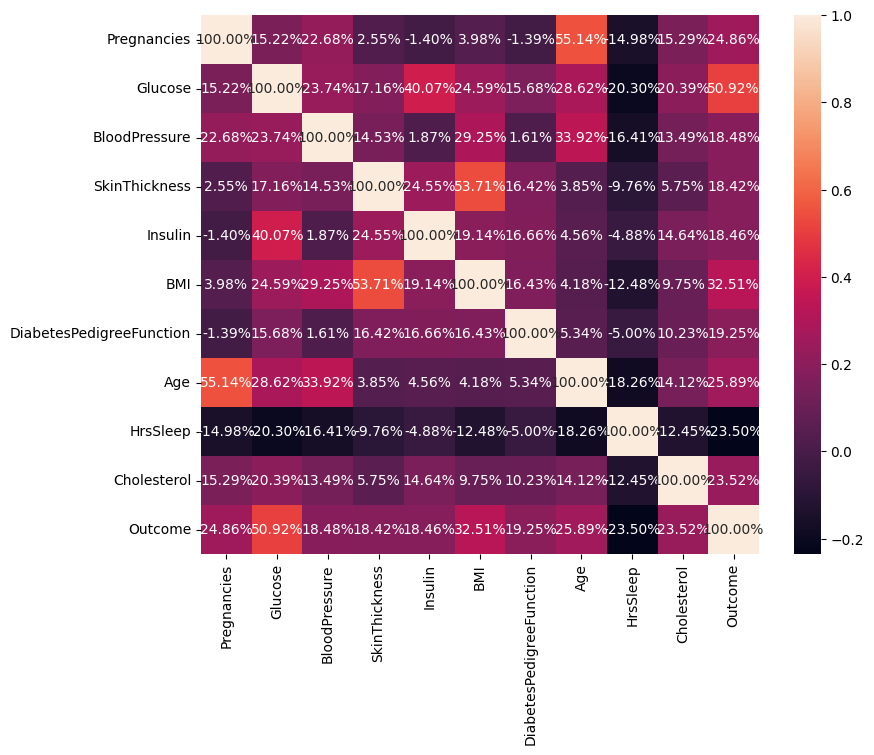

In [10]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2%')

- All the columns are moderately correlated

In [11]:
print("Percentage of patients without diabetes: ", round(target_vals[0]/len(df.Outcome), 2)*100)
print("Percentage of patients with diabetes: ", round(target_vals[1]/len(df.Outcome), 2)*100)

Percentage of patients without diabetes:  64.0
Percentage of patients with diabetes:  36.0


- Separating data and labels

In [12]:
x = df.drop(columns='Outcome', axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HrsSleep,Cholesterol
0,6,148.0,72.0,35.00000,80.47625,33.6,0.627,50,7,200
1,1,85.0,66.0,29.00000,80.47625,26.6,0.351,31,6,180
2,8,183.0,64.0,20.55625,80.47625,23.3,0.672,32,5,220
3,1,89.0,66.0,23.00000,94.00000,28.1,0.167,21,8,190
4,0,137.0,40.0,35.00000,168.00000,43.1,2.288,33,6,210


In [13]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

- Data Standardization

In [14]:
scalar = StandardScaler()

In [15]:
scalar.fit(x)

StandardScaler()

In [16]:
standardized_data = scalar.transform(x)
standardized_data

array([[ 0.63161549,  0.85565256, -0.02940275, ...,  1.43730758,
         0.72885607,  0.24548527],
       [-0.85628907, -1.22009068, -0.52952033, ..., -0.19404511,
        -0.25442362, -0.9501812 ],
       [ 1.22677731,  2.00884325, -0.69622619, ..., -0.10818444,
        -1.2377033 ,  1.44115174],
       ...,
       [ 1.22677731,  1.58051528,  0.97083242, ...,  1.09386491,
        -0.25442362,  1.74006836],
       [-1.15386999, -0.46227965, -0.19610861, ..., -0.53748778,
         0.72885607, -1.24909782],
       [ 0.9291964 ,  0.75680764,  0.30400897, ...,  0.3211189 ,
        -1.2377033 ,  0.54440189]])

In [17]:
pkl.dump(scalar, open('scaler.pkl', 'wb'))

In [18]:
X = standardized_data
Y = df['Outcome']

- train test split


In [19]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [20]:
train_x.shape

(560, 10)

In [21]:
test_x.shape

(240, 10)

In [22]:
train_y.shape

(560,)

In [23]:
test_y.shape

(240,)

In [24]:
rf_model = RandomForestClassifier(
    n_estimators=250,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

In [25]:
rf_model.fit(train_x, train_y)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=250, random_state=42)

In [26]:
rf_test_pred = rf_model.predict(test_x)

In [27]:
results_df = pd.DataFrame({'Actual': test_y, 'Predicted': rf_test_pred})

In [28]:
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

In [29]:
print(incorrect_predictions)

     Actual  Predicted
635       1          0
58        0          1
301       1          0
150       0          1
9         1          0
214       1          0
319       1          0
408       1          0
244       0          1
678       1          0
469       0          1
659       1          0
6         1          0
303       1          0
628       0          1
658       0          1
143       1          0
541       1          0
322       1          0
448       1          0
312       1          0
298       1          0
138       0          1
95        0          1
657       0          1
366       1          0
709       1          0
213       1          0
129       1          0
131       1          0
326       1          0
364       0          1
148       0          1
535       1          0
622       0          1
41        0          1
406       1          0
197       1          0
337       1          0
703       0          1
386       1          0
419       1          0


In [30]:
accuracy = accuracy_score(test_y, rf_test_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [31]:
conf_matrix = confusion_matrix(test_y, rf_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[141  14]
 [ 28  57]]


In [32]:
class_report = classification_report(test_y, rf_test_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       155
           1       0.80      0.67      0.73        85

    accuracy                           0.82       240
   macro avg       0.82      0.79      0.80       240
weighted avg       0.82      0.82      0.82       240



- Model Training


- Random Forest

In [33]:
rf = RandomForestClassifier(
    n_estimators=250,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

In [34]:
rf.fit(train_x, train_y)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=250, random_state=42)

In [35]:
rf_train_pred = rf.predict(train_x)

In [36]:
rf_test_pred = rf.predict(test_x)

In [37]:
print(rf_test_pred)

[0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1]


In [38]:
y_pred_rf = rf.predict(test_x)

In [39]:
print("Random Forest Results:")
print("Accuracy:", accuracy_score(test_y, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred_rf))
print("Precision, Recall, F1-Score:\n", precision_recall_fscore_support(test_y, y_pred_rf))

Random Forest Results:
Accuracy: 0.825
Confusion Matrix:
 [[141  14]
 [ 28  57]]
Precision, Recall, F1-Score:
 (array([0.83431953, 0.8028169 ]), array([0.90967742, 0.67058824]), array([0.87037037, 0.73076923]), array([155,  85]))


In [40]:
print("Random Forest Training Accuracy: ", round(accuracy_score(train_y, rf_train_pred), 2)*100)
print("Random Forest Testing Accuracy: ", round(accuracy_score(test_y, rf_test_pred), 2)*100)

Random Forest Training Accuracy:  91.0
Random Forest Testing Accuracy:  82.0


Test the model

In [41]:
input_data = (1,139,80,0,0,27.1,1.441,57,8,200)
data = np.array(input_data)
data

array([  1.   , 139.   ,  80.   ,   0.   ,   0.   ,  27.1  ,   1.441,
        57.   ,   8.   , 200.   ])

In [42]:
std_data = scalar.transform(data.reshape(1, -1))

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
prediction = rf.predict(std_data)

In [44]:
probability = rf.predict_proba(std_data)

In [45]:
diabetes_prob = probability[0][1] * 100
if prediction[0] == 1:
    print(f"The patient has diabetes with {diabetes_prob:.2f}% probability")
else:
    print(f"The patient does not have diabetes (Diabetes probability: {diabetes_prob:.2f}%)")

The patient does not have diabetes (Diabetes probability: 37.16%)


In [46]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'HrsSleep', 'Cholesterol',
       'Outcome'],
      dtype='object')

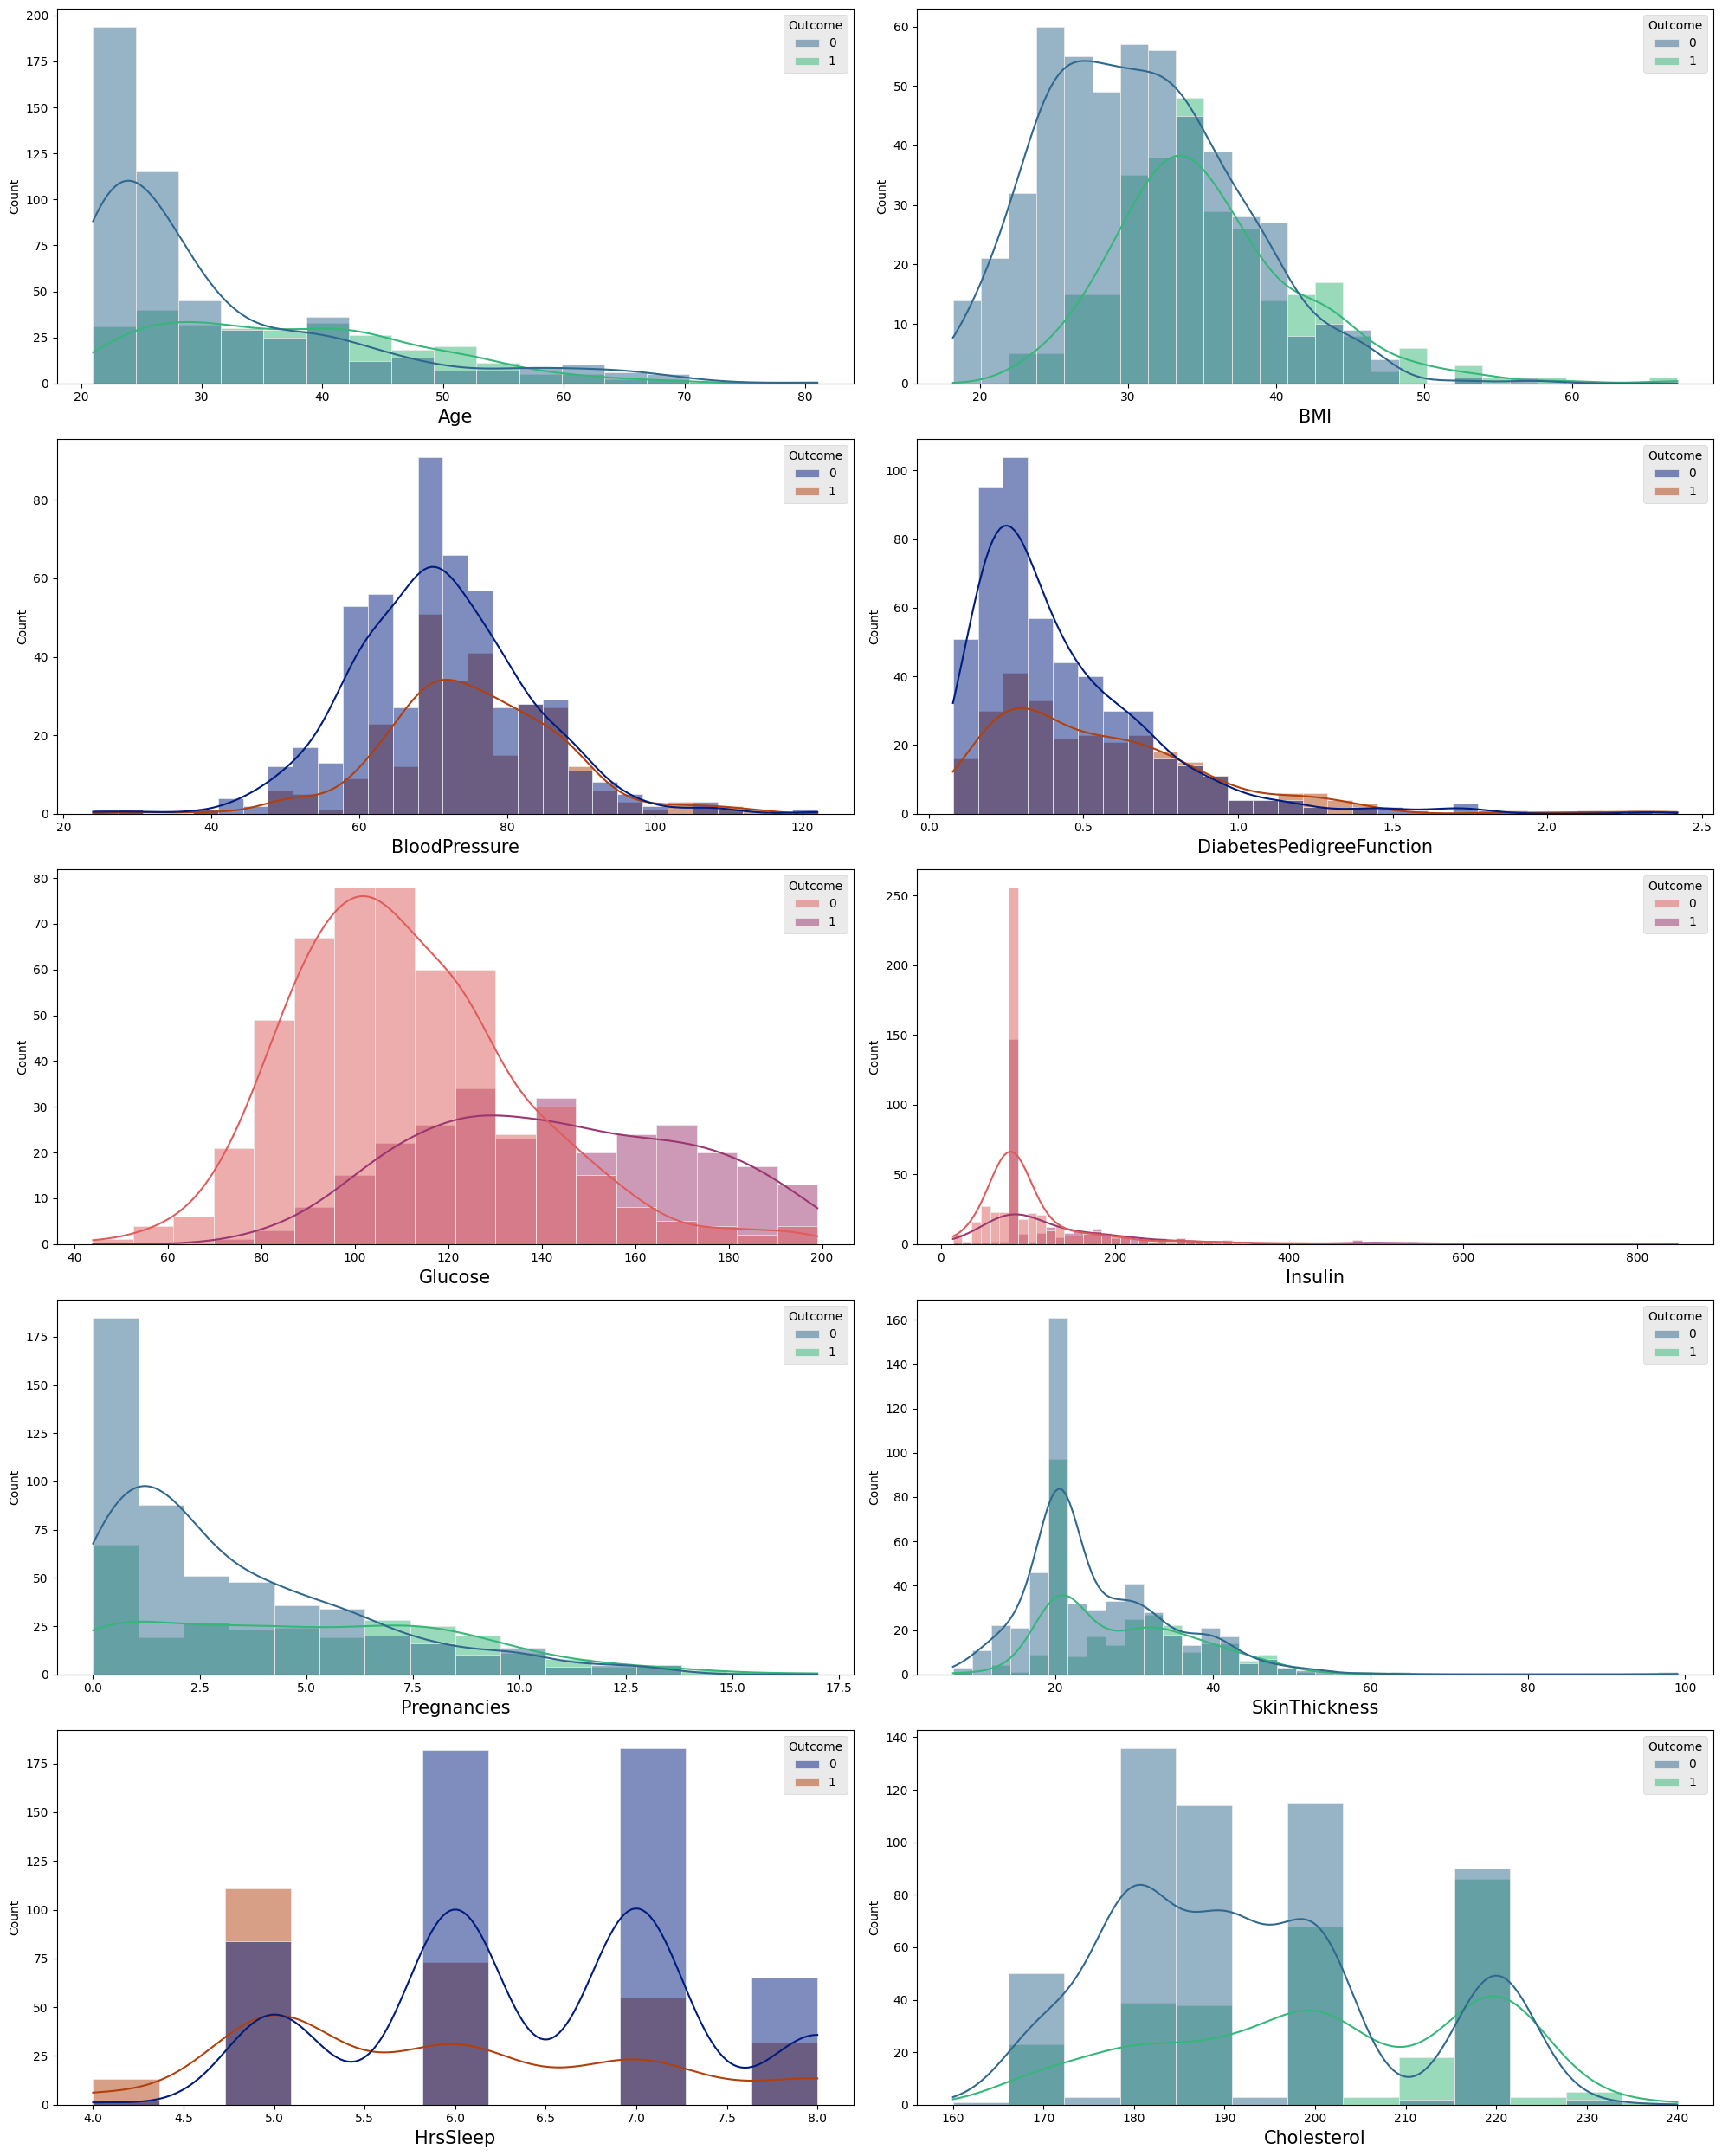

In [47]:
fig1, ax1 = plt.subplots(5, 2, figsize=(20, 25))
plt.style.use('ggplot')

sns.histplot(x=df['Age'], hue=df['Outcome'], palette="viridis", kde=True, ax=ax1[0, 0])
ax1[0, 0].set_xlabel('Age', fontsize=15)

sns.histplot(x=df['BMI'], hue=df['Outcome'], palette="viridis", kde=True, ax=ax1[0, 1])
ax1[0, 1].set_xlabel('BMI', fontsize=15)

sns.histplot(x=df['BloodPressure'], hue=df['Outcome'], palette="dark", kde=True, ax=ax1[1, 0])
ax1[1, 0].set_xlabel('BloodPressure', fontsize=15)

sns.histplot(x=df['DiabetesPedigreeFunction'], hue=df['Outcome'], palette="dark", kde=True, ax=ax1[1, 1])
ax1[1, 1].set_xlabel('DiabetesPedigreeFunction', fontsize=15)

sns.histplot(x=df['Glucose'], hue=df['Outcome'], palette="flare", kde=True, ax=ax1[2, 0])
ax1[2, 0].set_xlabel('Glucose', fontsize=15)

sns.histplot(x=df['Insulin'], hue=df['Outcome'], palette="flare", kde=True, ax=ax1[2, 1])
ax1[2, 1].set_xlabel('Insulin', fontsize=15)

sns.histplot(x=df['Pregnancies'], hue=df['Outcome'], palette="viridis", kde=True, ax=ax1[3, 0])
ax1[3, 0].set_xlabel('Pregnancies', fontsize=15)

sns.histplot(x=df['SkinThickness'], hue=df['Outcome'], palette="viridis", kde=True, ax=ax1[3, 1])
ax1[3, 1].set_xlabel('SkinThickness', fontsize=15)

sns.histplot(x=df['HrsSleep'], hue=df['Outcome'], palette="dark", kde=True, ax=ax1[4, 0])
ax1[4, 0].set_xlabel('HrsSleep', fontsize=15)

sns.histplot(x=df['Cholesterol'], hue=df['Outcome'], palette="viridis", kde=True, ax=ax1[4, 1])
ax1[4, 1].set_xlabel('Cholesterol', fontsize=15)

plt.tight_layout()
plt.show()


In [48]:
cf_matrix = confusion_matrix(test_y, rf_test_pred)
print("Confusion Matrix values (TN, FP, FN, TP):", cf_matrix.ravel())

Confusion Matrix values (TN, FP, FN, TP): [141  14  28  57]


<Axes: >

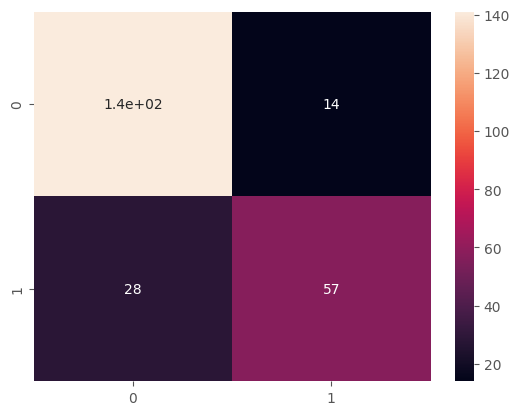

In [49]:
sns.heatmap(cf_matrix, annot=True)

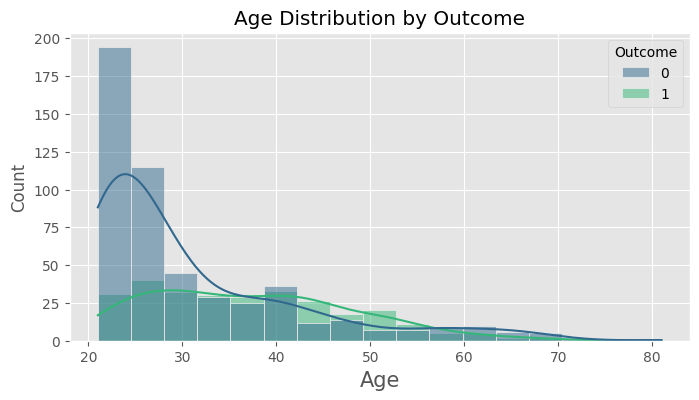

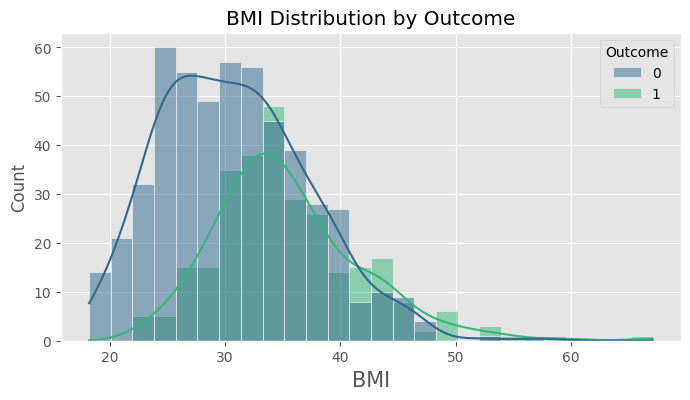

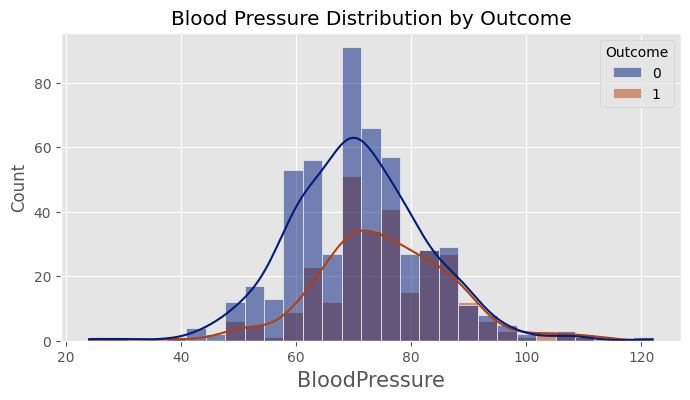

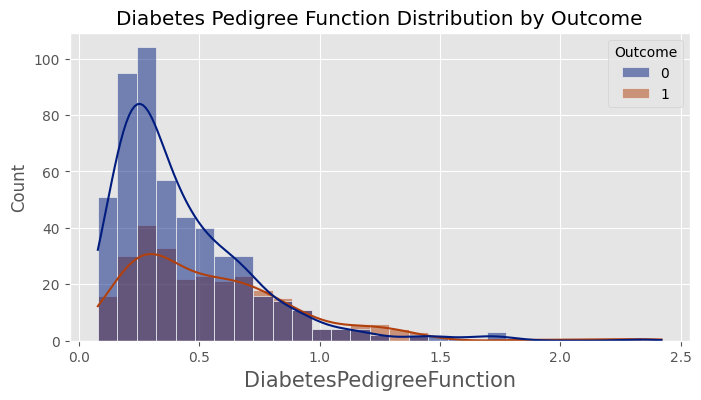

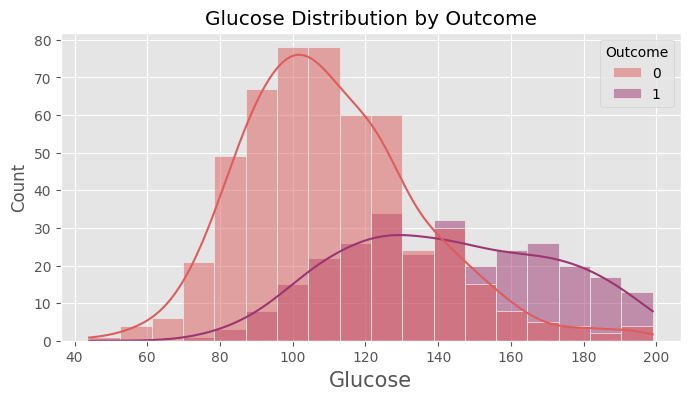

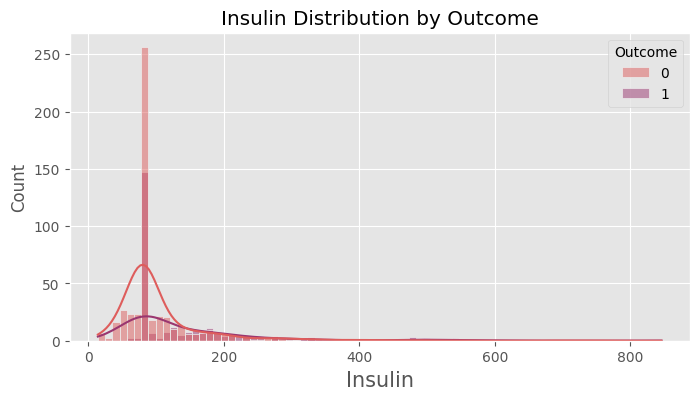

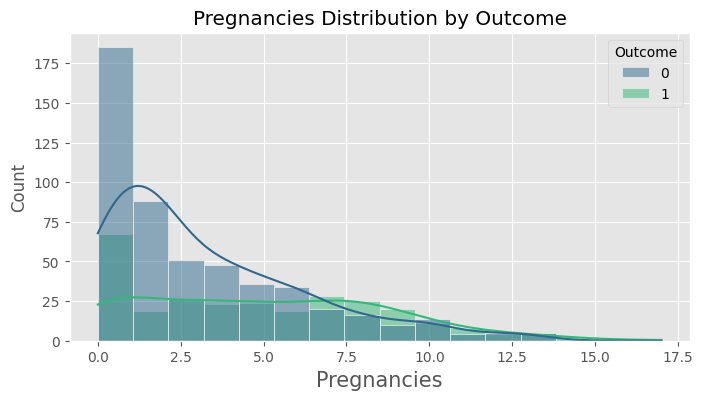

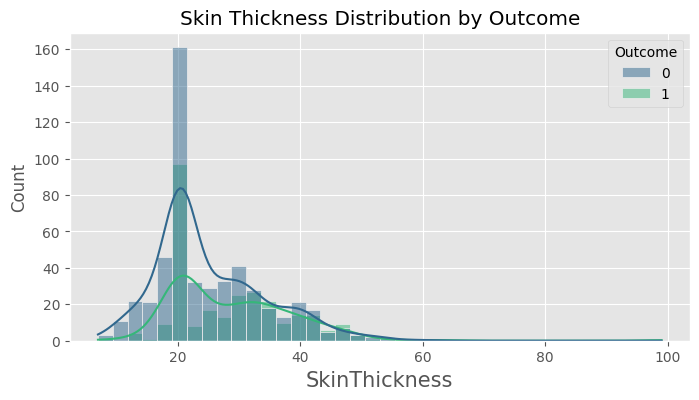

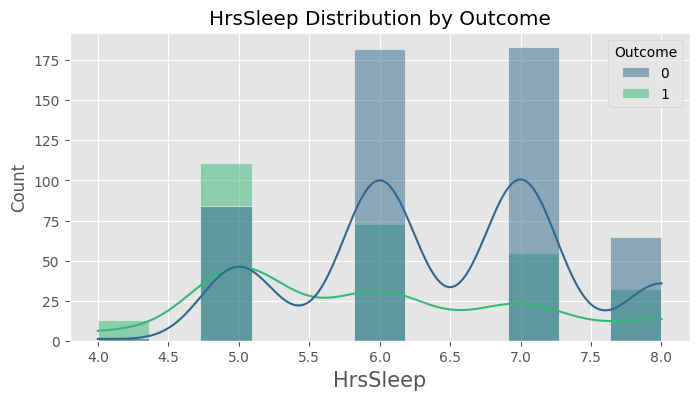

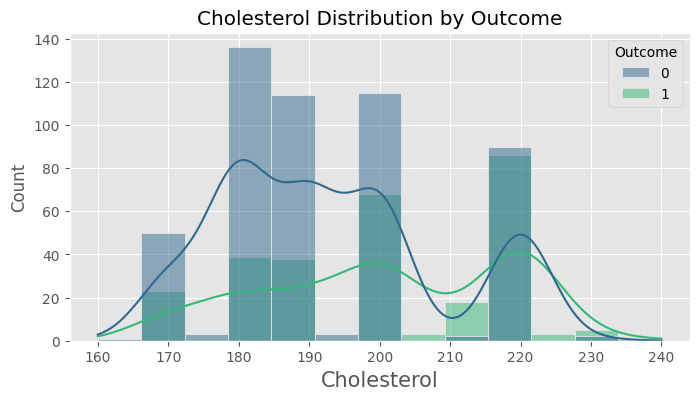

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.figure(figsize=(8, 4))
sns.histplot(x=df['Age'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('Age', fontsize=15)
plt.title('Age Distribution by Outcome')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(x=df['BMI'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('BMI', fontsize=15)
plt.title('BMI Distribution by Outcome')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(x=df['BloodPressure'], hue=df['Outcome'], palette="dark", kde=True)
plt.xlabel('BloodPressure', fontsize=15)
plt.title('Blood Pressure Distribution by Outcome')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(x=df['DiabetesPedigreeFunction'], hue=df['Outcome'], palette="dark", kde=True)
plt.xlabel('DiabetesPedigreeFunction', fontsize=15)
plt.title('Diabetes Pedigree Function Distribution by Outcome')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(x=df['Glucose'], hue=df['Outcome'], palette="flare", kde=True)
plt.xlabel('Glucose', fontsize=15)
plt.title('Glucose Distribution by Outcome')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(x=df['Insulin'], hue=df['Outcome'], palette="flare", kde=True)
plt.xlabel('Insulin', fontsize=15)
plt.title('Insulin Distribution by Outcome')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(x=df['Pregnancies'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('Pregnancies', fontsize=15)
plt.title('Pregnancies Distribution by Outcome')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(x=df['SkinThickness'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('SkinThickness', fontsize=15)
plt.title('Skin Thickness Distribution by Outcome')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(x=df['HrsSleep'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('HrsSleep', fontsize=15)
plt.title('HrsSleep Distribution by Outcome')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(x=df['Cholesterol'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('Cholesterol', fontsize=15)
plt.title('Cholesterol Distribution by Outcome')
plt.show()